In [1]:
pwd

u'/Users/auroraleport/Documents/LePort_git/BI_case_study/Paysafe'

In [2]:
import pandas as pd
loan_data = pd.read_csv('/Users/auroraleport/Documents/LePort_git/BI_case_study/LoanStats3d.csv')

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#dateparse = lambda dates: pd.datetime.strptime(dates, '%b-%y')
#import pandas as pd
#test = pd.read_csv('/Users/auroraleport/Documents/LePort_git/Untitled Folder/LoanStats3d.csv', parse_dates='earliest_cr_line', index_col='earliest_cr_line',date_parser=dateparse)

In [4]:
print "numb of columns in dataframe:", len(loan_data.columns)
pd.options.display.max_columns

numb of columns in dataframe: 111


20

In [5]:
pd.set_option("display.max_columns",111)

# 1:	Review the dataset and summarize your thoughts on any structural issues:
a.	Is there missing data? Is the missing data random or structured: Are some attributes missing more than others?
b.	Are any data values glaringly erroneous? 


ANSWER: 

a. Yes, you can clearly see there is missing data by looking at the discrepency between number of rows in entire dataframe (i.e. 421,097) and count of rows from certain columns (e.g. mths_since_last_delinq = 217,133). 

The missing data seems semi-structured: most of the missing data is from columns dealing with co-borrowers, number of trades or accounts opened in the past x months, months since recent circumstances involving delinquency.

b. Glaringly erronious data : A lot of missing data. Some data types are objects when they should be floats.

In [6]:
print "numb rows in entire dataframe:", len(loan_data)

numb rows in entire dataframe: 421097


In [7]:
loan_data.describe()
loan_data.dtypes

id                                 object
member_id                         float64
loan_amnt                         float64
funded_amnt                       float64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [8]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68446746,73336569.0,12000.0,12000.0,12000.0,36 months,5.32%,361.38,A,A1,Network Operation Engineer,4 years,MORTGAGE,53750.0,Source Verified,Dec-15,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,850xx,AZ,15.30,1.0,Sep-07,0.0,19.0,NaN,8.0,0.0,3172.0,17.20%,19.0,w,9176.68,9176.68,3243.55,3243.55,2823.32,420.23,0.0,0.0,0.0,Oct-16,361.38,Oct-16,Oct-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,142615.0,0.0,1.0,0.0,2.0,17.0,6468.0,22.3,0.0,0.0,0.0,22.2,18400.0,2.0,6.0,1.0,3.0,17827.0,8500.0,0.0,0.0,0.0,99.0,60.0,35.0,9.0,2.0,37.0,19.0,11.0,19.0,0.0,0.0,3.0,2.0,3.0,10.0,5.0,6.0,3.0,8.0,0.0,0.0,0.0,1.0,94.7,0.0,0.0,0.0,183062.0,11146.0,8500.0,29053.0
1,68338832,73542831.0,1400.0,1400.0,1400.0,36 months,12.88%,47.10,C,C2,Logistics Manager,3 years,MORTGAGE,64000.0,Not Verified,Dec-15,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,NaN,275xx,NC,34.95,0.0,Jun-96,0.0,NaN,NaN,17.0,0.0,37828.0,67.20%,24.0,w,1098.63,1098.63,421.40,421.40,301.37,120.03,0.0,0.0,0.0,Oct-16,47.10,Oct-16,Oct-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,325695.0,1.0,3.0,1.0,2.0,2.0,37430.0,67.4,0.0,2.0,7386.0,67.3,56300.0,0.0,2.0,0.0,4.0,19159.0,7940.0,77.0,0.0,0.0,46.0,234.0,18.0,2.0,4.0,28.0,NaN,18.0,NaN,0.0,7.0,11.0,8.0,11.0,3.0,12.0,17.0,11.0,17.0,0.0,0.0,0.0,1.0,100.0,75.0,0.0,0.0,372109.0,75258.0,34500.0,55501.0
2,68341763,72928789.0,20000.0,20000.0,20000.0,60 months,10.78%,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-15,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-00,0.0,NaN,NaN,6.0,0.0,7869.0,56.20%,18.0,w,17639.50,17639.50,3864.00,3864.00,2360.50,1503.50,0.0,0.0,0.0,Oct-16,432.66,Oct-16,Oct-16,0.0,NaN,1.0,JOINT,71000.0,13.85,Not Verified,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,72.8,0.0,2.0,2081.0,64.7,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,NaN,10.0,NaN,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0
3,68415473,73305264.0,25000.0,25000.0,25000.0,60 months,13.99%,581.58,C,C4,Executive Assistant,9 years,MORTGAGE,79000.0,Not Verified,Dec-15,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,212xx,MD,34.53,0.0,Jun-01,1.0,NaN,NaN,33.0,0.0,22519.0,18.60%,72.0,w,22263.77,22263.77,5185.64,5185.64

# 2: Summarize the types of “loan_status” presented in the LC dataset (e.g. frequency of types, etc).

In [9]:
loan_data.loan_status.unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'Late (16-30 days)',
       'In Grace Period', 'Charged Off', 'Default', nan], dtype=object)

In [10]:
# number of each unique loan status
gloan_data = loan_data[['loan_status']].groupby([loan_data['loan_status']]).count()
gloan_data

,loan_status
loan_status,
Charged Off,19533
Current,317232
Default,423
Fully Paid,67748
In Grace Period,3860
Late (16-30 days),2487
Late (31-120 days),9812


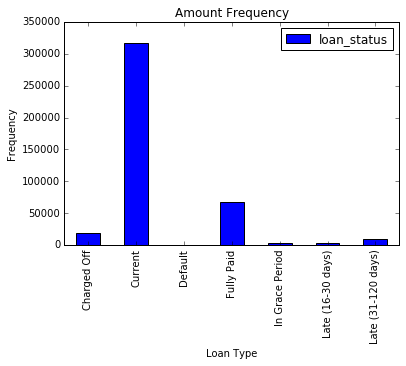

In [11]:
# bar plot of num in each loan status category:
%matplotlib inline
from itertools import cycle, islice
ax =  gloan_data.plot(kind='bar')
ax.set_title("Amount Frequency")
ax.set_xlabel("Loan Type")
ax.set_ylabel("Frequency")

# 3:	Using loan status of Charged Off, Default, as indicators of a “bad loans”, describe the predictive relationship of earliest_cr_line, annual_inc, and dti on probability of default.

Given dependent variables: 'Charged Off' and 'Defualt' & independent variables: 'earliest_cr_line', 'annual_inc', 'dti' ... what is the probability that a loan will defualt as opposed to be
charged off

# Observing, cleaning and standardizing the data

In [12]:
# Extracting only the columns we need:
loan_data[['earliest_cr_line', 'annual_inc', 'dti','loan_status']].head()

,earliest_cr_line,annual_inc,dti,loan_status
0,Sep-07,53750.0,15.30,Current
1,Jun-96,64000.0,34.95,Current
2,Aug-00,63000.0,10.78,Current
3,Jun-01,79000.0,34.53,Current
4,Mar-05,55000.0,25.49,Fully Paid


In [13]:
# extracting data that is of state: charged off or default
bad_data_all = loan_data[(loan_data.loan_status == 'Charged Off') | (loan_data.loan_status == 'Default')]

In [14]:
# extracting the particular columns we want to observe:
bad_data_small = bad_data_all[['earliest_cr_line', 'annual_inc', 'dti', 'loan_status']]

earliest_cr_line     object
annual_inc          float64
dti                 float64
loan_status          object
dtype: object
         annual_inc           dti
count  1.995600e+04  19956.000000
mean   7.018342e+04     21.749302
std    9.887122e+04     71.191819
min    0.000000e+00      0.000000
25%    4.213250e+04     14.600000
50%    6.000000e+04     21.150000
75%    8.400000e+04     27.990000
max    8.900060e+06   9999.000000


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


{'boxes': [<matplotlib.lines.Line2D at 0x10cbe9910>],
 'caps': [<matplotlib.lines.Line2D at 0x10cbf8c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x10ca7da10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10cabbad0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10cbe9f10>,
  <matplotlib.lines.Line2D at 0x10cbf8610>]}

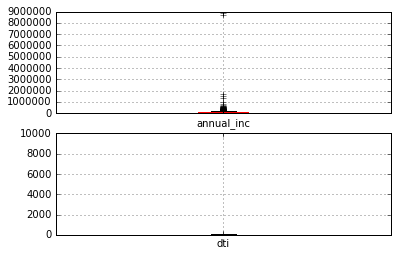

In [15]:
# Observing data
print bad_data_small.dtypes
print bad_data_small.describe()

# Outliers (represented by '+' in box plots) exist in both columns:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=1)
bad_data_small[['annual_inc']].boxplot(ax=axes[0])
bad_data_small[['dti']].boxplot(ax=axes[1])

In [16]:
# Observing extreem DTI outliers:
import numpy as np
q75, q25 = np.percentile(bad_data_small[['dti']], [75 ,25])
iqr = q75 - q25

print 'iqr:', iqr

print 'lower outer fence:', q25 - 3*iqr
print 'upper outer fence:', q75 + 3*iqr 

print bad_data_small[bad_data_small.dti >= 68.13] # one data point higher than this value
print bad_data_small[bad_data_small.dti < -25.53] # nothing lower than this value

#Getting rid of extreme outlier:
bad_data_small_corr1 = bad_data_small[bad_data_small.dti <= 68.13]

iqr: 13.39
lower outer fence: -25.57
upper outer fence: 68.16
      earliest_cr_line  annual_inc     dti  loan_status
65662           Aug-78         0.0  9999.0  Charged Off
Empty DataFrame
Columns: [earliest_cr_line, annual_inc, dti, loan_status]
Index: []


         annual_inc           dti
count  1.995500e+04  19955.000000
mean   7.018694e+04     21.249315
std    9.887245e+04      8.917871
min    4.524000e+03      0.000000
25%    4.215800e+04     14.600000
50%    6.000000e+04     21.150000
75%    8.400000e+04     27.990000
max    8.900060e+06     54.430000


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


{'boxes': [<matplotlib.lines.Line2D at 0x11054d7d0>],
 'caps': [<matplotlib.lines.Line2D at 0x10cf0c6d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x10cf169d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10cf16390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11054d990>,
  <matplotlib.lines.Line2D at 0x10cf0c090>]}

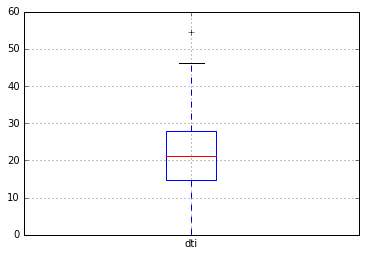

In [17]:
# are both columns now clean? Outliers still exists in annual_inc (i.e max annual_inc is  1.650000e+06!), 
# but while rare it is not unheard of and so do not have good reason to take these data points out.  

print bad_data_small_corr1.describe()
bad_data_small_corr1[['dti']].boxplot()

In [18]:
# Observing extreem annual_inc outliers: There are 260 extreem outliers, but we do not have a logical reason
# to take all of them out of the data because, while some may be rare (i.e max annual_inc is  1.650000e+06), 
# this high value is still plausable. 

q75, q25 = np.percentile(bad_data_small_corr1[['annual_inc']], [75 ,25])
iqr = q75 - q25

print 'iqr:', iqr

print 'lower outer fence:', q25 - 3*iqr
print 'upper outer fence:', q75 + 3*iqr 

print "extreem outliers:", len(bad_data_small_corr1[bad_data_small_corr1.annual_inc >= 209532].sort_values(['annual_inc'])) 

iqr: 41842.0
lower outer fence: -83368.0
upper outer fence: 209526.0
extreem outliers: 262


In [19]:
# I will consider anything beyond annual_inc of 8,000,000 as inplausable and will remove these 2 values:
print bad_data_small_corr1[bad_data_small_corr1.annual_inc >= 8000000]
bad_data_small_corr2 = bad_data_small_corr1[bad_data_small_corr1.annual_inc <= 8000000]
#bad_data_small[['annual_inc']].boxplot()

       earliest_cr_line  annual_inc   dti  loan_status
217571           Nov-06   8900060.0  0.09  Charged Off
400705           Jul-00   8706582.0  0.11  Charged Off


         annual_inc           dti
count  1.995300e+04  19953.000000
mean   6.931157e+04     21.251435
std    4.615111e+04      8.915804
min    4.524000e+03      0.000000
25%    4.215600e+04     14.610000
50%    6.000000e+04     21.150000
75%    8.400000e+04     27.990000
max    1.650000e+06     54.430000


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


{'boxes': [<matplotlib.lines.Line2D at 0x1107625d0>],
 'caps': [<matplotlib.lines.Line2D at 0x1106ea210>,
 'fliers': [<matplotlib.lines.Line2D at 0x1105a94d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1105b17d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1107580d0>,
  <matplotlib.lines.Line2D at 0x11074dfd0>]}

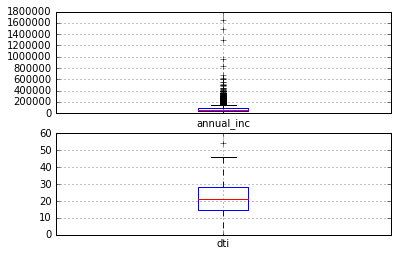

In [20]:
print bad_data_small_corr2.describe()
fig, axes = plt.subplots(nrows=2, ncols=1)
bad_data_small_corr2[['annual_inc']].boxplot(ax=axes[0])
bad_data_small_corr2[['dti']].boxplot(ax=axes[1])

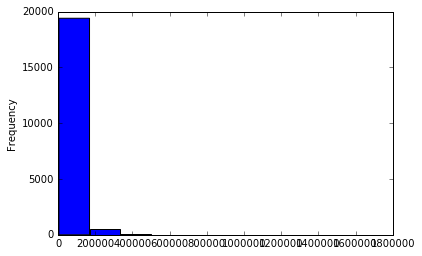

In [21]:
# Problem: annual_inc is not normally distributed
bad_data_small_corr2['annual_inc'].plot(kind = "hist")

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Axes(0.125,0.125;0.775x0.775)
Index([u'earliest_cr_line', u'annual_inc', u'dti', u'loan_status',
       u'annual_inc_log'],
      dtype='object')


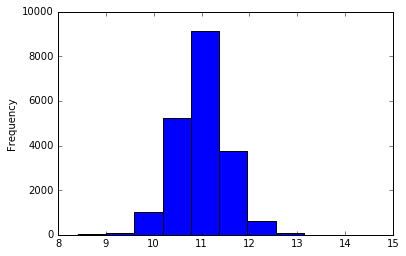

In [22]:
# Natural log reduces the variation caused by extreme values.
# hist. shows data is more normally distributed.
bad_data_small_corr2['annual_inc_log'] = np.log(bad_data_small_corr2['annual_inc'])

# By taking the natural log, we now have a gaussian distribution:
print np.log(bad_data_small_corr2['annual_inc']).plot(kind = "hist")
print bad_data_small_corr2.columns

In [23]:
bad_data_small_corr2.head()

,earliest_cr_line,annual_inc,dti,loan_status,annual_inc_log
197,Nov-06,73320.0,17.02,Charged Off,11.202589
223,Jan-02,68000.0,31.68,Charged Off,11.127263
254,May-03,125000.0,6.20,Charged Off,11.736069
456,Feb-96,160000.0,18.41,Charged Off,11.982929
641,Aug-97,89000.0,34.58,Charged Off,11.396392


In [24]:
# Cleaning date varable:
# converting date stored as an object to a date stored as datetime so as to use in logistic regression model:
bad_data_small_corr2['earliest_cr_line_date'] = pd.to_datetime(bad_data_small_corr2['earliest_cr_line'], format="%b-%y")

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [25]:
print bad_data_small_corr2.dtypes
pd.set_option("display.max_rows",100)
bad_data_small_corr2.head()

earliest_cr_line                 object
annual_inc                      float64
dti                             float64
loan_status                      object
annual_inc_log                  float64
earliest_cr_line_date    datetime64[ns]
dtype: object


,earliest_cr_line,annual_inc,dti,loan_status,annual_inc_log,earliest_cr_line_date
197,Nov-06,73320.0,17.02,Charged Off,11.202589,2006-11-01
223,Jan-02,68000.0,31.68,Charged Off,11.127263,2002-01-01
254,May-03,125000.0,6.20,Charged Off,11.736069,2003-05-01
456,Feb-96,160000.0,18.41,Charged Off,11.982929,1996-02-01
641,Aug-97,89000.0,34.58,Charged Off,11.396392,1997-08-01


In [26]:
# resetting index:
bad_data_small_corr2 = bad_data_small_corr2.reset_index(drop=True)

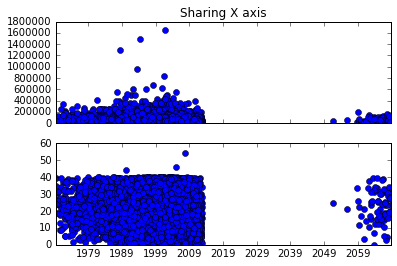

In [27]:
# plot shows outliers in x (date) that need to be fixed or removed.

fig, axarr = plt.subplots(nrows = 2, ncols=1, sharex=True)
axarr[0].plot_date(bad_data_small_corr2.earliest_cr_line_date, bad_data_small_corr2.annual_inc)
axarr[0].set_title('Sharing X axis')
axarr[1].plot_date(bad_data_small_corr2.earliest_cr_line_date, bad_data_small_corr2.dti)

count of dates > 2016: 74
count of all dates: 19953
    earliest_cr_line  annual_inc    dti  loan_status  annual_inc_log  \
156           Jan-64     89000.0  31.28  Charged Off       11.396392   

    earliest_cr_line_date  
156            2064-01-01  


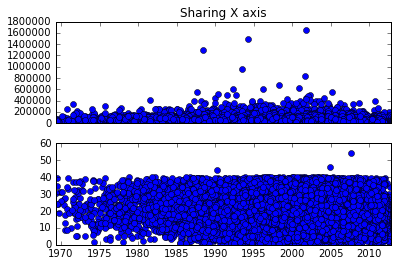

In [28]:
# Cutting out dates > 2016
print "count of dates > 2016:", len(bad_data_small_corr2[bad_data_small_corr2['earliest_cr_line_date'].dt.year > 2016])
print "count of all dates:", len(bad_data_small_corr2['earliest_cr_line_date'])

# 2012 is earliest correct year in dataset: 
print bad_data_small_corr2[bad_data_small_corr2['earliest_cr_line_date'].dt.year >= 2013].head(1)
bd_final = bad_data_small_corr2[bad_data_small_corr2['earliest_cr_line_date'].dt.year <= 2012]

bd_final.head()

fig, axarr = plt.subplots(nrows = 2, ncols=1, sharex=True)
axarr[0].plot_date(bd_final.earliest_cr_line_date, bd_final.annual_inc)
axarr[0].set_title('Sharing X axis')
axarr[1].plot_date(bd_final.earliest_cr_line_date, bd_final.dti)

1969-05-01 00:00:00


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


{'boxes': [<matplotlib.lines.Line2D at 0x112316790>],
 'caps': [<matplotlib.lines.Line2D at 0x112325690>,
 'fliers': [<matplotlib.lines.Line2D at 0x11232e990>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11232e350>],
 'whiskers': [<matplotlib.lines.Line2D at 0x112316950>,
  <matplotlib.lines.Line2D at 0x112325050>]}

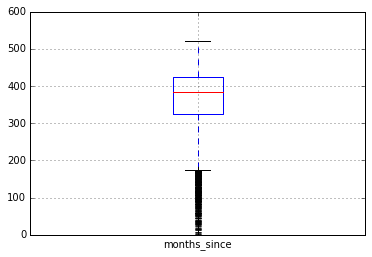

In [29]:
# converting date to months since 05-1969, assuming an average of 365/12 = 30.42 in a month.
print min(bd_final.earliest_cr_line_date)

bd_final['months_since'] = ((bd_final.earliest_cr_line_date - pd.to_datetime('1969-05-01')).astype('timedelta64[D]'))/30.42
#bd_final['months_since_log'] = np.log(bd_final[['months_since']])
#del bd_final['months_since_log']

bd_final[['months_since']].boxplot()


In [30]:
# Standardizing the data so that they have the properties of a standard normal distribution with
# μ=0
# and σ=1

from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(bd_final[['annual_inc_log', 'dti', 'months_since']])
df_std = std_scale.transform(bd_final[['annual_inc_log', 'dti', 'months_since']])

print('Mean after standardization:\nannual_inc_log={:.17f}, dti={:.17f}, months_since={:.17f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean(), df_std[:,2].mean()))
print('\nStandard deviation after standardization:\nannual_inc_log={:.2f}, dti={:.2f}, months_since={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std(), df_std[:,2].std()))

Mean after standardization:
annual_inc_log=-0.00000000000000032, dti=-0.00000000000000002, months_since=0.00000000000000040

Standard deviation after standardization:
annual_inc_log=1.00, dti=1.00, months_since=1.00


   annual_inc_log       dti  months_since
0        0.381372 -0.474205      0.972853
1        0.237265  1.170515      0.289222
2        1.401981 -1.688111      0.477076
3        1.874253 -0.318259     -0.547790
4        0.752139  1.495869     -0.335922


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ad53310>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116006110>]], dtype=object)

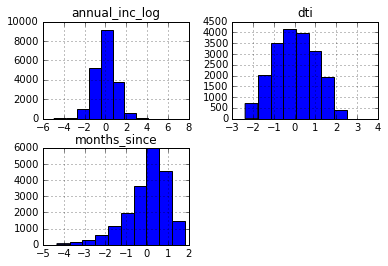

In [31]:
bd_std = (pd.DataFrame(df_std, columns = ['annual_inc_log', 'dti', 'months_since']))
print bd_std.head()
bd_std.hist()

In [32]:
bd_std.head()

,annual_inc_log,dti,months_since
0,0.381372,-0.474205,0.972853
1,0.237265,1.170515,0.289222
2,1.401981,-1.688111,0.477076
3,1.874253,-0.318259,-0.547790
4,0.752139,1.495869,-0.335922


In [33]:
# maping categorical label to numerical in order to perform logistic regression analysis: Charged Off = 0, Default = 1

# Initialize label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Creating labels
encoded_status = label_encoder.fit_transform(bd_final['loan_status'])
bd_final['encoded_status'] = encoded_status

bd_final.head()
print len(encoded_status)

19879


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


19879
Count charged off: 19385
Count default: 420


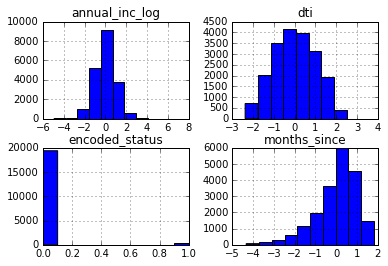

In [34]:
bd_std_final = bd_std.join(bd_final['encoded_status'])
bd_std_final.hist()

# Unequal ratio between charged off and default status.
print len(bd_std_final.encoded_status)
print 'Count charged off:',len(bd_std_final[bd_std_final.encoded_status == 0])
print 'Count default:',len(bd_std_final[bd_std_final.encoded_status == 1])

In [35]:
#bd_std_final.plot(kind='scatter', x=bd_std_final.annual_inc_log, y=bd_std_final.months_since)

# defining the predictive relationship between earliest_cr_line, annual_inc, and dti on probability of default

# Logistic Regression

In [36]:
bd_final.head()

,earliest_cr_line,annual_inc,dti,loan_status,annual_inc_log,earliest_cr_line_date,months_since,encoded_status
0,Nov-06,73320.0,17.02,Charged Off,11.202589,2006-11-01,450.295858,0
1,Jan-02,68000.0,31.68,Charged Off,11.127263,2002-01-01,392.274819,0
2,May-03,125000.0,6.20,Charged Off,11.736069,2003-05-01,408.218277,0
3,Feb-96,160000.0,18.41,Charged Off,11.982929,1996-02-01,321.236029,0
4,Aug-97,89000.0,34.58,Charged Off,11.396392,1997-08-01,339.217620,0


In [37]:
import numpy as np
from patsy import dmatrices
from sklearn.cross_validation import train_test_split

y, X = dmatrices('encoded_status ~ annual_inc_log + dti + months_since', bd_final, return_type="dataframe")

print X.columns
y = np.ravel(y)
print list(label_encoder.inverse_transform([0,1]))
print "Charged Off: 0, defualt: 1"

Index([u'Intercept', u'annual_inc_log', u'dti', u'months_since'], dtype='object')
['Charged Off', 'Default']
Charged Off: 0, defualt: 1


//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
# Classes are not equally balanced, so we will want to stratisfy the data:
from sklearn import cross_validation, datasets 
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X,y,train_size=.8,stratify=y)

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)

for train, test in skf.split(X, y):
    print("%s %s" % (train, test))
#Xlr, Xtestlr, ylr, ytestlr = skf.split(X, y)

In [39]:
#from sklearn.linear_model import LogisticRegression
import sklearn.linear_model as lm
from sklearn.grid_search import GridSearchCV
from sklearn import svm, datasets

clfl2=lm.LogisticRegression(class_weight='balanced', fit_intercept=False)  # class_weight='balanced' should weight unbalanced classes evenly. 
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}
fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(Xlr, ylr)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

//anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


(LogisticRegression(C=100, class_weight='balanced', dual=False,
           fit_intercept=False, intercept_scaling=1, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
 {'C': 100},
 0.525938502169402,
 [mean: 0.50009, std: 0.03593, params: {'C': 0.0001},
  mean: 0.49010, std: 0.02673, params: {'C': 0.001},
  mean: 0.51078, std: 0.00709, params: {'C': 0.1},
  mean: 0.52292, std: 0.01280, params: {'C': 1},
  mean: 0.52544, std: 0.01428, params: {'C': 10},
  mean: 0.52594, std: 0.01399, params: {'C': 100}])

from sklearn.grid_search import GridSearchCV
from sklearn import svm, datasets
clfl2=LogisticRegression(class_weight='auto')
parameters = {'kernel':('linear', 'rbf')}
svr = svm.SVC()
fitmodel = GridSearchCV(svr, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(X, y)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

# Answer #3

In [40]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

clfl2=lm.LogisticRegression(C=fitmodel.best_params_['C'], class_weight='balanced')
clfl2.fit(Xlr, ylr)
ypred2=clfl2.predict(Xtestlr)
print "[  Charged Off    Default]"
probs = clfl2.predict_proba(Xtestlr)
print probs
print "-------------------------------------"
print 'accuracy of model:', accuracy_score(ypred2, ytestlr) 
print 'roc_auc:', metrics.roc_auc_score(ytestlr, probs[:, 1]) # area under the curve very low (i.e. 0.47) due to unbalanced classes

# ROC_AUC_score:
# if the classifier is very good, the true positive rate will increase quickly and the area under the curve will be 
# close to 1. If the classifier is no better than random guessing, the true positive rate will increase linearly 
# with the false positive rate and the area under the curve will be around 0.5.
# One characteristic of the AUC is that it is independent of the fraction of the test population which is class 0 or class 1: 
# which is useful here since our classifiers are unbalanced.

print "-------------------------------------"
print "confusion matrix:"
print metrics.confusion_matrix(ypred2, ytestlr)
print "-------------------------------------"
print "precision vs recall:"
print metrics.classification_report(ypred2, ytestlr, target_names = ['Charged Off', 'default'])

print "Precision: measure of a classifiers exactness"
print "Recall: measure of a classifiers completeness" 
#... recall is very low (i.e 0) on defualt since we have unbalanced classes.
print "f1-score: the harmonic mean of precision and recall"
print "support: number of samples of the true response that lie in that class"

[  Charged Off    Default]
[[ 0.49239545  0.50760455]
 [ 0.5112793   0.4887207 ]
 [ 0.48806007  0.51193993]
 ..., 
 [ 0.48877448  0.51122552]
 [ 0.5265367   0.4734633 ]
 [ 0.51121796  0.48878204]]
-------------------------------------
accuracy of model: 0.506036217304
roc_auc: 0.492741521069
-------------------------------------
confusion matrix:
[[1978   50]
 [1914   34]]
-------------------------------------
precision vs recall:
             precision    recall  f1-score   support

Charged Off       0.51      0.98      0.67      2028
    default       0.40      0.02      0.03      1948

avg / total       0.46      0.51      0.36      3976

Precision: measure of a classifiers exactness
Recall: measure of a classifiers completeness
f1-score: the harmonic mean of precision and recall
support: number of samples of the true response that lie in that class


In [41]:
# a negative but low correlation ( person's r = -0.225) exists between annual_inc and dti
# a negative but low correlation ( person's r = -0.166) exists between annual_inc and months_since
# a negative but very low correlation ( person's r = -0.054) exists between dti and months_since

bd_final[['annual_inc_log','dti','months_since']].corr(method='pearson')

,annual_inc_log,dti,months_since
annual_inc_log,1.000000,-0.225016,-0.166022
dti,-0.225016,1.000000,-0.054496
months_since,-0.166022,-0.054496,1.000000


In [42]:
# Regression coefficients represent the mean change in the response variable (i.e. default) for one unit of change in 
# the predictor variable (e.g. dti), while holding other predictors (e.g. annual_inc_log, months_since) in the model 
# constant. 

# for example, dti increases the likelihood of defualting, all else equal, by 0.10.

# Unfortunatly, the problem that remains is that my model is extremely biased toward predicting a charged off outcome...
import sklearn.linear_model as lm
coefficients = pd.DataFrame(zip(bd_final[['annual_inc_log','dti','months_since']].columns, np.transpose(clfl2.coef_)))
coefficients

,0,1
0,annual_inc_log,[-0.896869571177]
1,dti,[0.167845780973]
2,months_since,[-0.00354254255777]


# 4.	What is the frequency of “bad loan” within the grades provided by the lending club? Provide a graphic summarizing your results. How do you interpret these results?

In [43]:
gloan_data.sum()

loan_status    421095
dtype: int64

In [44]:
loan_data.loan_status.unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'Late (16-30 days)',
       'In Grace Period', 'Charged Off', 'Default', nan], dtype=object)

In [69]:
# Combining Default and Charged off loans to created "Bad Loan" category:

bl_rename = loan_data.loan_status.replace(['Current', 'Fully Paid', 'Late (31-120 days)', 'Late (16-30 days)', \
                               'In Grace Period', 'Charged Off', 'Default'
                              ], \
                               ['Current', 'Fully Paid', 'Late (31-120 days)', 'Late (16-30 days)', \
                                'In Grace Period', 'Bad_Loan', 'Bad_Loan'
                               ])


In [46]:
bl_rename = pd.DataFrame(bl_rename)
bl_rename.loan_status.unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'Late (16-30 days)',
       'In Grace Period', 'Bad_Loan', nan], dtype=object)

# Answer #4

                    loan_status
loan_status                    
Bad_Loan                  19956
Current                  317232
Fully Paid                67748
In Grace Period            3860
Late (16-30 days)          2487
Late (31-120 days)         9812


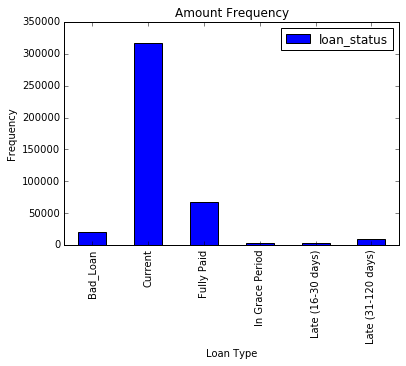

In [47]:
# bar graph displaying of counts of unique loans types:

gbl_rename = bl_rename[['loan_status']].groupby([bl_rename['loan_status']]).count()
ax = gbl_rename.plot(kind = 'bar')
ax.set_title("Amount Frequency")
ax.set_xlabel("Loan Type")
ax.set_ylabel("Frequency")
print gbl_rename

In [48]:
# Frequency of Bad Loans = Bad loans / Total loans :
gbl_sum = gbl_rename.sum()
print "Total count bad loans:", gbl_sum
print "% of the time Bad Loans occur:", (gbl_rename['loan_status']['Bad_Loan']/gbl_sum)*100

Total count bad loans: loan_status    421095
dtype: int64
% of the time Bad Loans occur: loan_status    4.739073
dtype: float64


# 5.	Select one of the below topics and explain it to: 
a.	Someone with significant mathematical experience, and 
b.	Someone with little mathematical experience. You can use graphics/diagrams if you wish.

Topic: Logistic regression

a. Logistic regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using an sigmoid shaped distribution function. This function constrains the estimated probabilities to lie between 0 and 1. Additionally, the logistic regression model is a non-linear transformation of linear regression.

b. Logistic Regression is used to classify data into given categories, where the category type is dependent upon a data point's particular attributes. For example, say a clothing store owner would like to predict a new customer's t-shirt size (i.e. small, medium or large) based on that customer's height. 
Given a sample of people with known t-shirt sizes and heights, he could use logistic regression to predict a new 
customer's t-shirt size based on their given height.

# Set B1 (answer at least one question) 
1. LC uses a number of variables to determine the pricing for its loans. Review and attempt to explain the relationship between the 
a) sub_grade
b) the int_rate
c) the loan_amnt, and d) the loan term (variable= term). 


In [49]:
pricing_df = loan_data[['sub_grade', 'int_rate', 'loan_amnt','term']]
pricing_df.tail()

,sub_grade,int_rate,loan_amnt,term
421092,D2,15.99%,13000.0,60 months
421093,E3,19.99%,12000.0,60 months
421094,B5,11.99%,20000.0,36 months
421095,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN


# Cleaning columns

In [51]:
int_rate_clean = []
try:
    for item in pricing_df.int_rate:
        int_rate_clean.append(float(item[0:-1]))
except:
    #pass
    int_rate_clean.append(0)
print len(pricing_df.int_rate)
print len(pd.DataFrame(int_rate_clean))
int_rate_clean = pd.DataFrame(int_rate_clean, columns=['int_clean'])

421097
421096


In [52]:
pricing_df_a = int_rate_clean.join(pricing_df)

In [53]:
pricing_df_a.dtypes

int_clean    float64
sub_grade     object
int_rate      object
loan_amnt    float64
term          object
dtype: object

In [54]:
term_count = []
try:
    for item in pricing_df.term:
        term_count.append(float(item[0:-6]))
except:
    #pass
    term_count.append(0)
print len(pricing_df_a.term)
print len(pd.DataFrame(term_count))
term_count_df = pd.DataFrame(term_count, columns=['term_count'])

421096
421096


In [103]:
pricing_df_b = term_count_df.join(pricing_df_a)

In [104]:
print pricing_df_b.dtypes
pricing_df_b.sub_grade.sort_values().unique()
# can convert this to matrix of 1 and zeros

term_count    float64
int_clean     float64
sub_grade      object
int_rate       object
loan_amnt     float64
term           object
dtype: object


array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5', nan], dtype=object)

In [105]:
# Combining categories to make result more manageable:

sub_grade_rename = pricing_df_b.sub_grade.replace(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], \
                               ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C',
       'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'D', 'E', 'E',
       'E', 'E', 'E', 'F', 'F', 'F', 'F', 'F', 'G', 'G', 'G',
       'G', 'G'])

In [106]:
pricing_df_b['sub_grade_rename'] = sub_grade_rename

In [119]:
pricing_df_b.head()

,term_count,int_clean,sub_grade,int_rate,loan_amnt,term,sub_grade_rename
0,36.0,5.32,A1,5.32%,12000.0,36 months,A
1,36.0,12.88,C2,12.88%,1400.0,36 months,C
2,60.0,10.78,B4,10.78%,20000.0,60 months,B
3,60.0,13.99,C4,13.99%,25000.0,60 months,C
4,36.0,19.89,E3,19.89%,8650.0,36 months,E


In [130]:
# One hot encoding into matrix of ones and zeros:
df = pd.DataFrame({'sub_grade_rename': pricing_df_b.sub_grade_rename.tolist()})
one_hot = pd.get_dummies(df['sub_grade_rename'])
pricing_df_final = pricing_df_b.join(one_hot)
pricing_df_final.head()

,term_count,int_clean,sub_grade,int_rate,loan_amnt,term,sub_grade_rename,A,B,C,D,E,F,G
0,36.0,5.32,A1,5.32%,12000.0,36 months,A,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36.0,12.88,C2,12.88%,1400.0,36 months,C,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,60.0,10.78,B4,10.78%,20000.0,60 months,B,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,60.0,13.99,C4,13.99%,25000.0,60 months,C,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,36.0,19.89,E3,19.89%,8650.0,36 months,E,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [127]:
print pricing_df_final.dtypes
pricing_df_final.tail()
#pricing_df_final = pricing_df_final[pricing_df_final.term_count != 0.00]
pricing_df_B1 = pricing_df_final[['loan_amnt','term_count','int_clean','A','B','C','D','E','F','G']]

loan_amnt     float64
term_count    float64
int_clean     float64
A             float64
B             float64
C             float64
D             float64
E             float64
F             float64
G             float64
dtype: object


In [ ]:
pricing_df_B1.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d0f2d90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1247ee250>]], dtype=object)

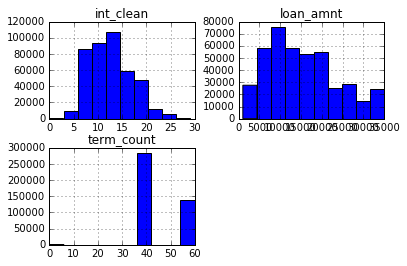

In [124]:
pricing_df_B1[['loan_amnt','term_count','int_clean']].hist()

In [58]:
#from pandas.tools.plotting import scatter_matrix
#df = pricing_df_final
#scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


{'boxes': [<matplotlib.lines.Line2D at 0x1164b0050>],
 'caps': [<matplotlib.lines.Line2D at 0x1164d8990>,
 'fliers': [<matplotlib.lines.Line2D at 0x1164dcc90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1164dc650>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1164b0490>,
  <matplotlib.lines.Line2D at 0x1164d8350>]}

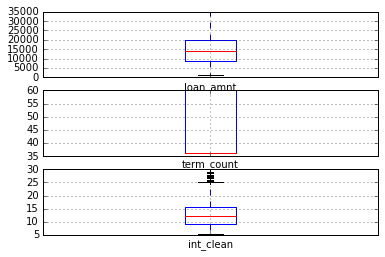

In [59]:
fig, axes = plt.subplots(nrows=3, ncols=1)
pricing_df_B1[['loan_amnt']].boxplot(ax=axes[0])
pricing_df_B1[['term_count']].boxplot(ax=axes[1])
pricing_df_B1[['int_clean']].boxplot(ax=axes[2])

# Answer B1

In [129]:
# a positive but low correlation ( person's r = 0.140) exists between loan_amount and int_rate
# a positive and medium correlation ( person's r = 0.407) exists between loan_amount and term_count
# a positive and medium correlation ( person's r = 0.439) exists between int_rate and term_count
# You can also see the relationship between each of the loan term categories (i.e. A-G) and other variables. 
pricing_df_B1.corr(method='pearson')

,loan_amnt,term_count,int_clean,A,B,C,D,E,F,G
loan_amnt,1.000000,0.406855,0.140605,-0.029380,-0.071790,-0.036556,0.034481,0.113454,0.087421,0.043529
term_count,0.406855,1.000000,0.438833,-0.277728,-0.143191,0.040532,0.133553,0.257731,0.175668,0.085516
int_clean,0.140605,0.438833,1.000000,-0.601757,-0.368437,0.102464,0.399402,0.466127,0.394357,0.237072
A,-0.029380,-0.277728,-0.601757,1.000000,-0.285865,-0.290864,-0.191992,-0.138151,-0.070948,-0.033028
B,-0.071790,-0.143191,-0.368437,-0.285865,1.000000,-0.394288,-0.260260,-0.187274,-0.096175,-0.044772
C,-0.036556,0.040532,0.102464,-0.290864,-0.394288,1.000000,-0.264811,-0.190548,-0.097857,-0.045554
D,0.034481,0.133553,0.399402,-0.191992,-0.260260,-0.264811,1.000000,-0.125776,-0.064593,-0.030069
E,0.113454,0.257731,0.466127,-0.138151,-0.187274,-0.190548,-0.125776,1.000000,-0.046479,-0.021637
F,0.087421,0.175668,0.394357,-0.070948,-0.096175,-0.097857,-0.064593,-0.046479,1.000000,-0.011112
G,0.043529,0.085516,0.237072,-0.033028,-0.044772,-0.045554,-0.030069,-0.021637,-0.011112,1.000000


# Set B2 (answer at least one question) 
1. The LC risk model has assigned records to different pricing tiers, indicated within the sub_grade variable. Using the sub_grade as the dependent variable, determine which other variables are most related/predictive and attempt to explain why. 

In [131]:
pricing_df_final.head()

,term_count,int_clean,sub_grade,int_rate,loan_amnt,term,sub_grade_rename,A,B,C,D,E,F,G
0,36.0,5.32,A1,5.32%,12000.0,36 months,A,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36.0,12.88,C2,12.88%,1400.0,36 months,C,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,60.0,10.78,B4,10.78%,20000.0,60 months,B,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,60.0,13.99,C4,13.99%,25000.0,60 months,C,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,36.0,19.89,E3,19.89%,8650.0,36 months,E,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [132]:
# maping categorical label to numerical in order to perform logistic regression analysis:

# Initialize label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Creating labels
encoded_grade = label_encoder.fit_transform(pricing_df_final['sub_grade_rename'])
pricing_df_final['encoded_grade'] = encoded_grade

print len(pricing_df_final)
pricing_df_final.head()

421096


,term_count,int_clean,sub_grade,int_rate,loan_amnt,term,sub_grade_rename,A,B,C,D,E,F,G,encoded_grade
0,36.0,5.32,A1,5.32%,12000.0,36 months,A,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,36.0,12.88,C2,12.88%,1400.0,36 months,C,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
2,60.0,10.78,B4,10.78%,20000.0,60 months,B,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
3,60.0,13.99,C4,13.99%,25000.0,60 months,C,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
4,36.0,19.89,E3,19.89%,8650.0,36 months,E,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5


In [144]:
y2, X2 = dmatrices('encoded_grade ~ loan_amnt + term_count + int_clean', pricing_df_final[['loan_amnt','term_count','int_clean','encoded_grade']], return_type="dataframe")

print X2.columns
y2 = np.ravel(y2)

print pricing_df_final.encoded_grade.sort_values().unique()
print list(label_encoder.inverse_transform([ 0,  1,  2,  3,  4,  5,  6,  7]))


Index([u'Intercept', u'loan_amnt', u'term_count', u'int_clean'], dtype='object')
[0 1 2 3 4 5 6 7]
[nan, 'A', 'B', 'C', 'D', 'E', 'F', 'G']


In [146]:
X2lr, X2testlr, y2lr, y2testlr = train_test_split(X2, y2)

In [149]:
#pricing_df_final.corr(method='pearson')

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn import svm, datasets
clfl2=LogisticRegression(class_weight='balanced', fit_intercept=False)  # class_weight='auto' should help with balancing unbalanced classes 
parameters = {"C": [ 1, 10]}
fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(X2lr, y2lr)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

(LogisticRegression(C=10, class_weight='balanced', dual=False,
           fit_intercept=False, intercept_scaling=1, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
 {'C': 10},
 0.36205635470725506,
 [mean: 0.35994, std: 0.00640, params: {'C': 1},
  mean: 0.36206, std: 0.00751, params: {'C': 10}])

In [154]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

clfl2=lm.LogisticRegression(C=fitmodel.best_params_['C'], class_weight='balanced')
clfl2.fit(X2lr, y2lr)
y2pred2=clfl2.predict(X2testlr)

probs = clfl2.predict_proba(X2testlr)
print probs
print "-------------------------------------"
print 'accuracy of model:', accuracy_score(y2pred2, y2testlr) 
#print 'roc_auc:', metrics.roc_auc_score(y2testlr, probs[:, 1]) # area under the curve very low (i.e. 0.47) due to unbalanced classes

#print "-------------------------------------"
#print "confusion matrix:"
#print metrics.confusion_matrix(y2pred2, y2testlr)
print "-------------------------------------"
print "precision vs recall:"
print metrics.classification_report(y2pred2, y2testlr, target_names = ['A', 'B','C','D','E','F','G'])

print "Precision: measure of a classifiers exactness"
print "Recall: measure of a classifiers completeness" 
#... recall is very low (i.e 0) on defualt since we have unbalanced classes.
print "f1-score: the harmonic mean of precision and recall"
print "support: number of samples of the true response that lie in that class"

[[  1.86588606e-03   7.98901395e-02   1.66908080e-01 ...,   4.80356501e-01
    1.22268814e-01   5.19103512e-03]
 [  4.79646772e-01   2.88346590e-01   1.66820065e-01 ...,   4.48128050e-03
    2.42757458e-07   1.09252112e-08]
 [  1.94981829e-04   2.58363523e-02   1.49874221e-01 ...,   3.26397122e-01
    1.01754530e-01   2.01478331e-02]
 ..., 
 [  1.57060483e-02   1.55911414e-01   2.01476349e-01 ...,   4.51191415e-01
    3.16120984e-02   1.10556553e-03]
 [  2.41803291e-01   3.20879550e-01   2.76724964e-01 ...,   1.62261782e-02
    4.03272441e-06   2.22753183e-07]
 [  4.53825384e-02   2.30600788e-01   2.29738458e-01 ...,   3.53605544e-01
    1.00908093e-02   3.07352418e-04]]
-------------------------------------
accuracy of model: 0.375933278872
-------------------------------------
precision vs recall:
             precision    recall  f1-score   support

          A       0.78      0.67      0.72     21684
          B       0.23      0.33      0.27     20776
          C       0.04      0

In [153]:
import sklearn.linear_model as lm
coefficients = pd.DataFrame(zip(X2.columns, np.transpose(clfl2.coef_)))
coefficients

,0,1
0,Intercept,"[0.524436996342, 0.00235213939537, -0.00084445..."
1,loan_amnt,"[3.96222739985e-05, -1.23399093336e-05, -2.432..."
2,term_count,"[0.069627282702, 0.0222689256688, -0.024651292..."
3,int_clean,"[-0.644146051702, -0.205543567515, -0.00662755..."
